In [1]:
# 데이터 파악
import matplotlib
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# 패키지 다운
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook

from konlpy.tag import Okt
from collections import Counter

In [4]:
# 데이터 불러오기
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")

In [5]:
# 상단 데이터 확인
train.head()

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [6]:
# 데이터 구조 확인
print(train.shape)
print(test.shape)

(24998, 4)
(1666, 4)


In [7]:
# 1. 히스토그램
# train데이터의 label컬럼을 저장
feature=train['label']

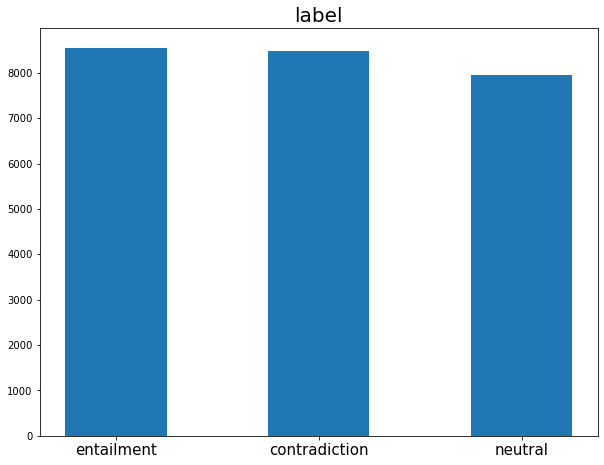

In [8]:
plt.figure(figsize=(10, 7.5))
plt.title('label', fontsize=20)

# value를 count해서 temp에 저장
temp=feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5)
plt.xticks(temp.keys(), fontsize=15)
plt.show()

# 라벨이 일정하게 분포되어 있는 것을 확인!

In [9]:
# 실제 text와 가설 text의 평균 길이
premise_len_mean=np.mean(train['premise'].str.len())
print('실제 Text 평균 길이:', premise_len_mean)
hypo_len_mean=np.mean(train['hypothesis'].str.len())
print("가설 Text 평균 길이:", hypo_len_mean)

실제 Text 평균 길이: 45.406552524201935
가설 Text 평균 길이: 24.924433954716378


In [11]:
# entailment:참 / contradiction:거짓 / neutral:중립
mask_true=(train.label=='entailment')
mask_false=(train.label=='contradiction')
mask_neutral=(train.label=='neutral')

# train데이터의 premise컬럼을 복사해서 df_train에 저장
df_train=train.premise.copy()

In [12]:
# train데이터의 premise컬럼의 mask_true, mask_false, mask_neutral 행을 따로 저장?
df_true=train.loc[mask_true,:].premise
df_false=train.loc[mask_false,:].premise
df_neu=train.loc[mask_neutral,:].premise

In [13]:
# 세 집합을 리스트로 묶어줌
compare=[df_train, df_true, df_false, df_neu]

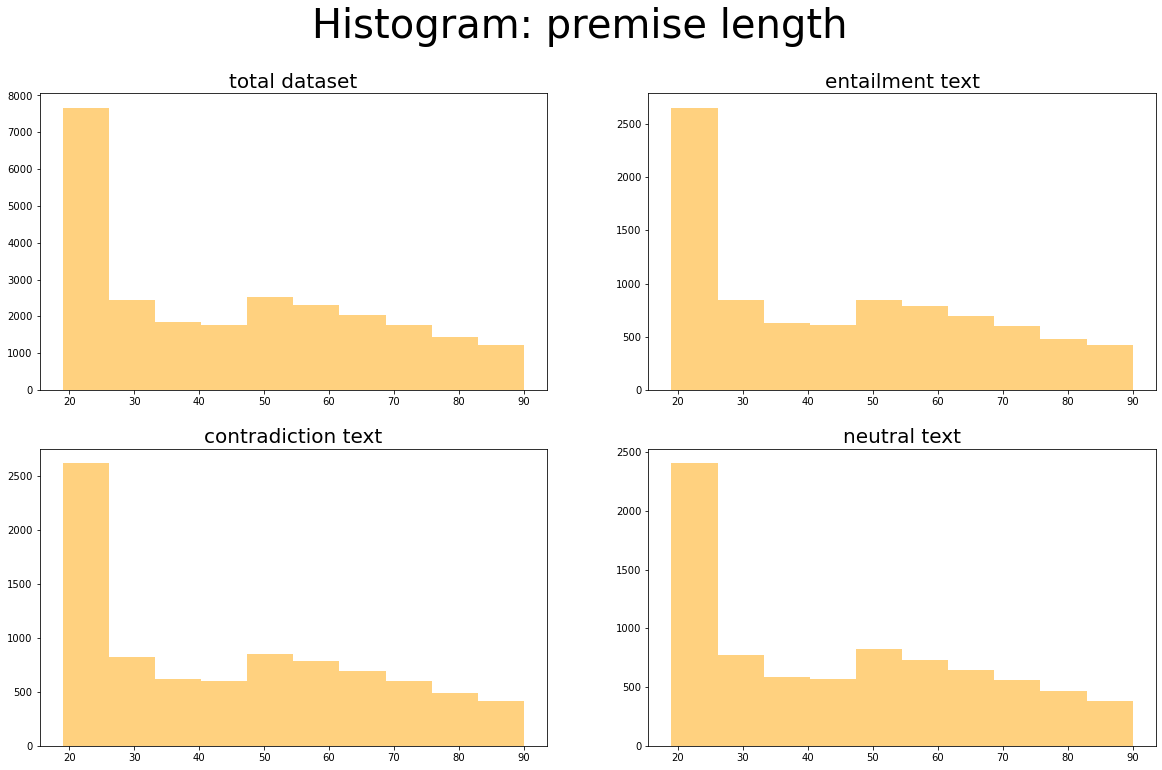

In [15]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
# premise의 길이는 대부분 20-30자에 분포

plt.figure(figsize=(20,12))
plt.suptitle("Histogram: premise length", fontsize=40)
name = ['total dataset', 'entailment text', 'contradiction text', 'neutral text']

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document]
    plt.subplot(2, 2, i+1)
    plt.title(name[i], fontsize=20)
    plt.hist(string_len, alpha=0.5, color='orange') 
    
plt.show()